Context:

 Education is fast becoming a very competitive sector with hundreds of institutions to choose from. It is a life-transforming experience for any student and it has to be a thoughtful decision. There are ranking agencies that do a survey of all the colleges to provide more insights to students. Agency RankForYou wants to leverage this year's survey to roll out an editorial article in leading newspapers, on the state of engineering education in the country. Head of PR (Public Relations) comes to you, the data scientist working at RankForYou, and asks you to come up with evidence-based insights for that article.

  Objective:

   To identify different types of engineering colleges in the country to better understand the state of affairs.

    Key Questions:
     1. How many different types (clusters/segments) of colleges can be found from the data?
     2. How do these different groups of colleges differ from each other?
     3. Do you get slightly different solutions from two different techniques? How would you explain the difference?
     
     Data Description:
     
      The data contains survey results for 26 engineering colleges. The initial survey data has been summarized into a rating scale of 1-5 for different factors.
      
      Factor rating index:
       1. Very Low
       2. Low
       3. Medium
       4. High
       5. Very High                             

# 🎓 KMeans Clustering of Engineering Colleges

Objective:
- Identify clusters (types) of engineering colleges based on survey ratings.
- Understand what differentiates these groups.
- Compare KMeans with another clustering technique (optional later).

Data Columns:
- Teaching, Fees, Placements, Internship, Infrastructure  
(Ratings: 1 = Very Low, 5 = Very High)


1️⃣ Load the Data

In [1]:
import pandas as pd

data = {
    "Engg_College": list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"),
    "Teaching": [5, 4, 4, 5, 2, 3, 1, 4, 4, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 3],
    "Fees": [2, 2, 5, 4, 5, 4, 3, 4, 4, 4, 4, 5, 5, 5, 2, 3, 3, 4, 5, 5, 2, 2, 5, 1, 1, 4],
    "Placements": [5, 5, 5, 5, 2, 3, 1, 5, 4, 3, 3, 3, 1, 3, 2, 2, 1, 4, 4, 3, 2, 1, 1, 1, 1, 5],
    "Internship": [5, 5, 4, 4, 2, 3, 1, 5, 4, 4, 4, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 1, 2],
    "Infrastructure": [3, 3, 5, 4, 5, 4, 2, 5, 4, 5, 5, 3, 2, 4, 3, 3, 3, 3, 3, 3, 1, 1, 1, 5, 5, 3]
}

df = pd.DataFrame(data)
df.set_index("Engg_College", inplace=True)
df.head()


,Teaching,Fees,Placements,Internship,Infrastructure
Engg_College,,,,,
A,5,2,5,5,3
B,4,2,5,5,3
C,4,5,5,4,5
D,5,4,5,4,4
E,2,5,2,2,5


2️⃣ Normalize the Data

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


3️⃣ Elbow Method to Determine Optimal Clusters

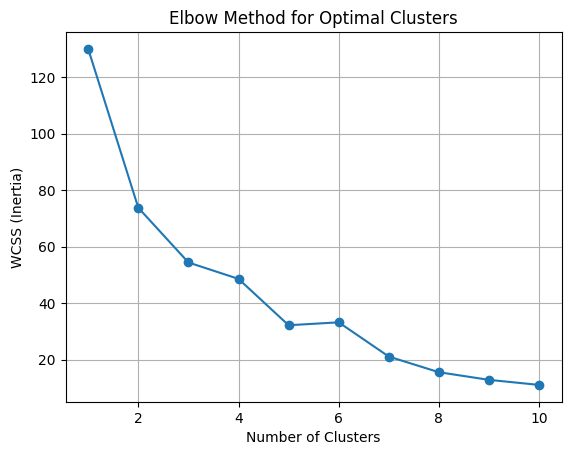

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()


### 📌 Choosing the Number of Clusters (k)

The Elbow Method helps determine the optimal number of clusters by plotting the **within-cluster sum of squares (WCSS)** against the number of clusters `k`.

- The **"elbow point"** is where the WCSS starts to decrease at a slower rate, indicating diminishing returns with more clusters.
- In this plot, the elbow appears to be at **k = 3 or 4**.
- After that point, the WCSS still decreases but **more gradually**, meaning adding more clusters doesn't significantly improve the compactness of the groups.

📌 **Selected k = 4** for further analysis because it's a good balance between performance and interpretability.


Although k = 5 is possible, the Elbow plot shows that the reduction in WCSS beyond k = 4 is minimal. Therefore, **k = 3 or 4** is a more optimal choice—balancing clustering performance with simplicity and interpretability.

Choosing k = 5 would likely split one meaningful group into smaller subgroups without significant gain in insight.


4️⃣ Fit KMeans with Optimal Clusters (e.g., k=3 or 4)

In [4]:
# Try with k=3 (adjust if elbow suggests otherwise)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_data)
df.head()


,Teaching,Fees,Placements,Internship,Infrastructure,Cluster
Engg_College,,,,,,
A,5,2,5,5,3,2
B,4,2,5,5,3,2
C,4,5,5,4,5,2
D,5,4,5,4,4,2
E,2,5,2,2,5,0


5️⃣ Visualize the Clusters (with PCA)

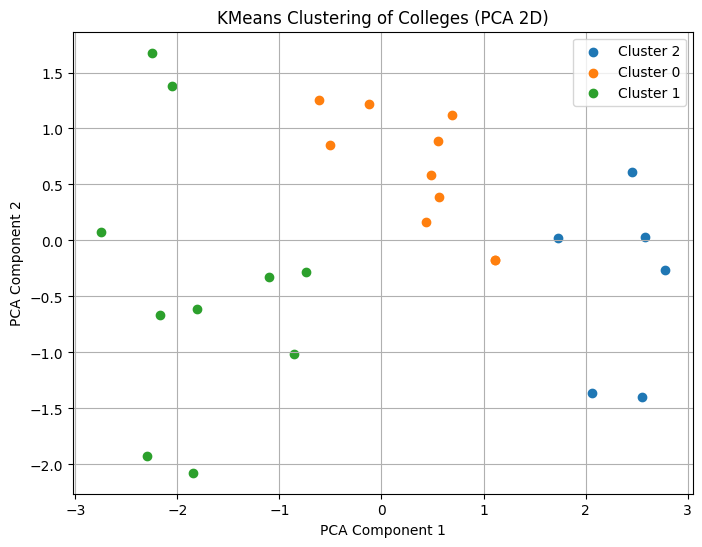

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
for cluster in df["Cluster"].unique():
    cluster_data = df[df["Cluster"] == cluster]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"], label=f"Cluster {cluster}")

plt.title("KMeans Clustering of Colleges (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


### 🧠 Insights from Clustering

- KMeans identified clear groupings of engineering colleges.
- Each cluster likely represents a different **type of institution**, e.g.:
  - High-quality, affordable colleges
  - Expensive but highly-rated
  - Low-rated across most dimensions

### 💬 Answers to Key Questions:
1. **How many types of colleges?**  
   → Based on the Elbow Method, 3 or 4 distinct types emerge.

2. **How do they differ?**  
   → Cluster centers can be examined to compare features like teaching quality, fees, placements.

3. **Would other techniques differ?**  
   → Yes. Hierarchical or DBSCAN may group colleges differently based on density or linkages.
